In [1]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("/home1/smaruj/akitaV2-analyses/figures/plot_styles/global_plotting_style.mplstyle")
from scipy import stats

from helper import (read_and_average_virtual_exp,
                    load_top_bottom_sequences,
                    calculate_gc_content_at_positions,
                    process_sequences)

# GC Content

In [2]:
paths = {
    "top": "./fasta_files/150_top_insertion_30bp_flanks.fasta",
    "bottom": "./fasta_files/150_bottom_insertion_30bp_flanks.fasta"
}

# Load sequences
sequences = {key: load_top_bottom_sequences(path) for key, path in paths.items()}

# Access sequences
whole_top, upstream_top, downstream_top = sequences["top"]
whole_bottom, upstream_bottom, downstream_bottom = sequences["bottom"]

### GC Content - Core + 30bp Flanks

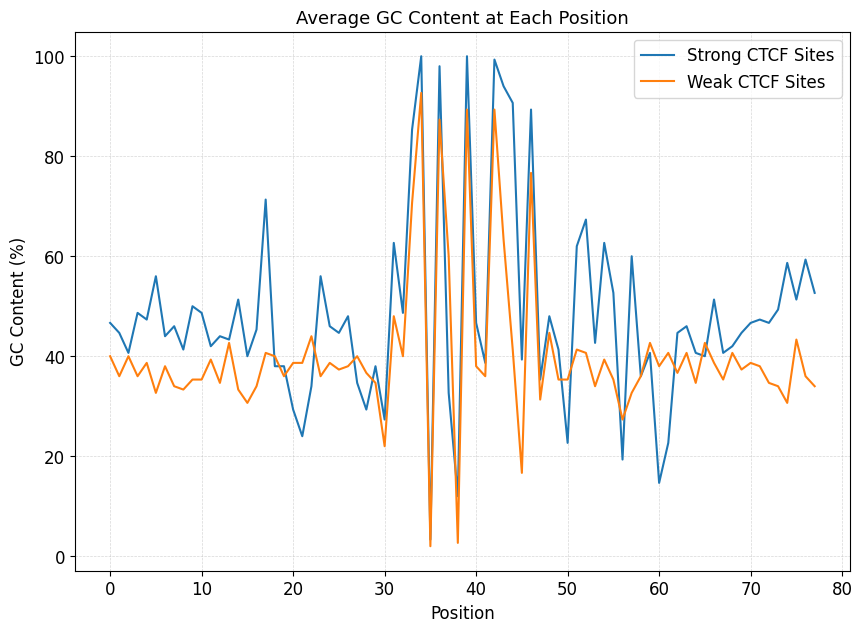

In [3]:
plt.figure(figsize=(10, 7))
plt.plot(calculate_gc_content_at_positions(whole_top), label='Strong CTCF Sites')
plt.plot(calculate_gc_content_at_positions(whole_bottom), label='Weak CTCF Sites')
plt.xlabel('Position')
plt.ylabel('GC Content (%)')
plt.title('Average GC Content at Each Position')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
# plt.savefig("./plots/GC_content_strong_vs_weak.pdf", format="pdf", bbox_inches="tight")
plt.show()

### GC Content - Upstream Flank

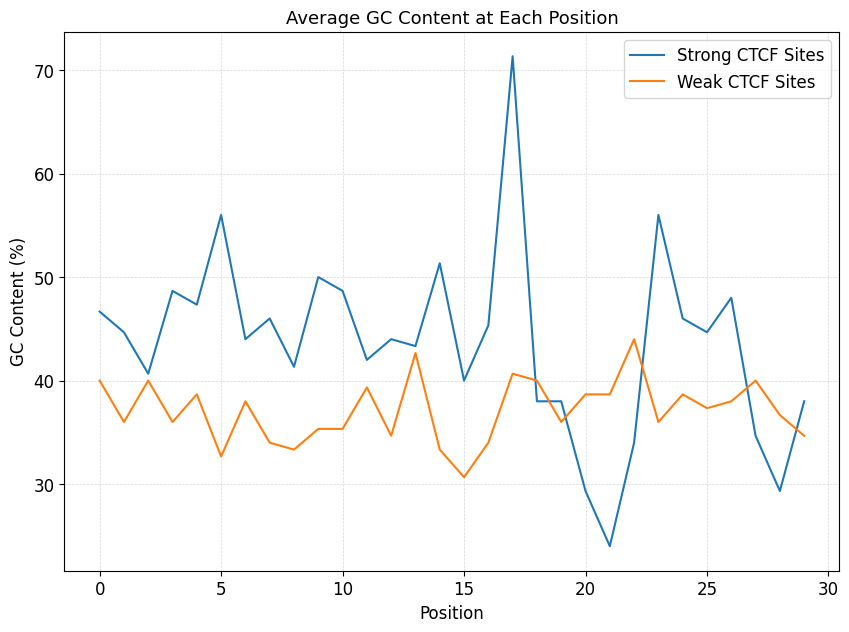

In [4]:
plt.figure(figsize=(10, 7))
plt.plot(calculate_gc_content_at_positions(upstream_top), label='Strong CTCF Sites')
plt.plot(calculate_gc_content_at_positions(upstream_bottom), label='Weak CTCF Sites')
plt.xlabel('Position')
plt.ylabel('GC Content (%)')
plt.title('Average GC Content at Each Position')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

### GC Content - Downstream Flank

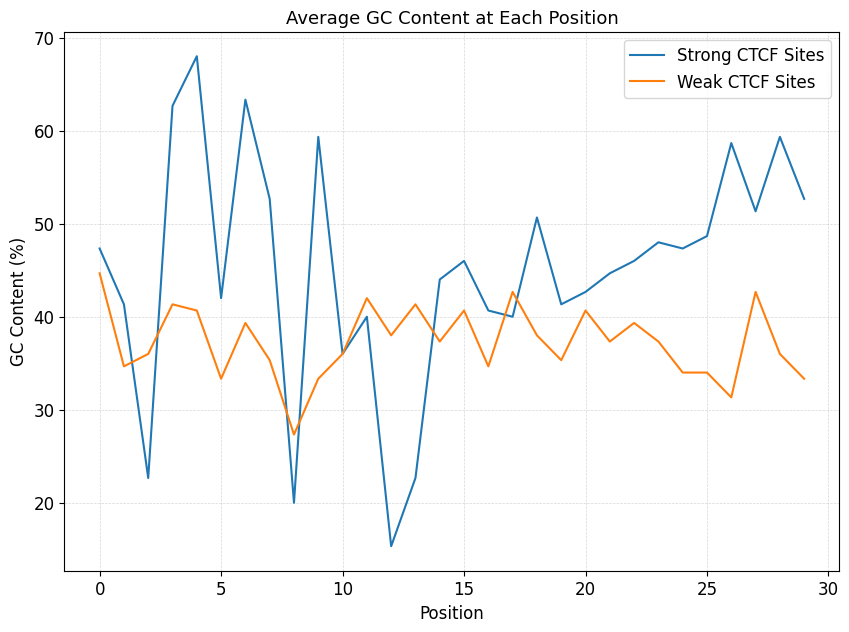

In [5]:
plt.figure(figsize=(10, 7))
plt.plot(calculate_gc_content_at_positions(downstream_top), label='Strong CTCF Sites')
plt.plot(calculate_gc_content_at_positions(downstream_bottom), label='Weak CTCF Sites')
plt.xlabel('Position')
plt.ylabel('GC Content (%)')
plt.title('Average GC Content at Each Position')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

# k=2

In [31]:
# Define sequences
sequences = {
    "whole_top": whole_top,
    "upstream_top": upstream_top,
    "downstream_top": downstream_top,
    "whole_bottom": whole_bottom,
    "upstream_bottom": upstream_bottom,
    "downstream_bottom": downstream_bottom
}

# Process sequences and apply PCA
pca_results_k2 = process_sequences(sequences, k=2)

# Access PCA results
whole_top_pca_result_k2 = pca_results_k2["whole_top"]
upstream_top_pca_result_k2 = pca_results_k2["upstream_top"]
downstream_top_pca_result_k2 = pca_results_k2["downstream_top"]
whole_bottom_pca_result_k2 = pca_results_k2["whole_bottom"]
upstream_bottom_pca_result_k2 = pca_results_k2["upstream_bottom"]
downstream_bottom_pca_result_k2 = pca_results_k2["downstream_bottom"]

In [32]:
from collections import Counter

def generate_kmers(sequence, k):
    k_mers = []
    for i in range(len(sequence) - k + 1):
        k_mers.append(sequence[i : i + k])
    return k_mers


def count_kmers(sequences, k):
    kmer_counts = []
    for sequence in sequences:
        k_mers = generate_kmers(sequence, k)
        kmer_counts.append(Counter(k_mers))
    return kmer_counts

In [40]:
kmer_counts_strong = count_kmers(upstream_top, k=5)
kmer_counts_weak = count_kmers(upstream_bottom, k=5)

In [41]:
total_counts_strong = Counter()
for counter in kmer_counts_strong:
    total_counts_strong.update(counter)

In [42]:
total_counts_weak = Counter()
for counter in kmer_counts_weak:
    total_counts_weak.update(counter)

In [43]:
kmer_col = []
w_kmer_count = []
s_kmer_count = []

for im in total_counts_weak.items():
    w_kmer, w_count = im
    for it in total_counts_strong.items():
        s_kmer, s_count = it
        if w_kmer == s_kmer:
            kmer_col.append(s_kmer)
            w_kmer_count.append(w_count)
            s_kmer_count.append(s_count)

In [25]:
import pandas as pd

In [44]:
df = pd.DataFrame({"kmer": kmer_col, "weak_count": w_kmer_count, "strong_count": s_kmer_count})

In [45]:
df["diff(s-w)"] = df["strong_count"] - df["weak_count"]

In [46]:
df.sort_values(by="diff(s-w)", ascending=False)

,kmer,weak_count,strong_count,diff(s-w)
732,GCAGT,1,21,20
682,TGCAA,2,17,15
304,TGCAG,4,18,14
366,TTGCA,2,16,14
269,CTGCA,3,14,11
...,...,...,...,...
266,ATGAT,14,1,-13
233,TTAAA,19,4,-15
16,AAAAT,21,6,-15
15,AAAAA,19,2,-17


In [ ]:
sorted_kmers = sorted(total_counts.items(), key=lambda x: x[1], reverse=True)

In [ ]:
print("Sorted K-mer Counts:")
for kmer, count in sorted_kmers[:20]:
    print(f"{kmer}: {count}")

## PCA, 2-mers count, Core + 30bp Flanks

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(whole_top_pca_result_k2[:, 0], whole_top_pca_result_k2[:, 1], label="Strong CTCF Sites", alpha=0.6, edgecolors='w')
plt.scatter(whole_bottom_pca_result_k2[:, 0], whole_bottom_pca_result_k2[:, 1], label="Weak CTCF Sites", alpha=0.6, edgecolors='w')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 2-mer Counts, Core + 30bp Flanks')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
# plt.savefig("./plots/2mer_analysis_strong_vs_weak.pdf", format="pdf", bbox_inches="tight")
plt.show()

## PCA, 2-mers count, Upstream Flank

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(upstream_top_pca_result_k2[:, 0], upstream_top_pca_result_k2[:, 1], label="Strong CTCF Sites", alpha=0.6, edgecolors='w')
plt.scatter(upstream_bottom_pca_result_k2[:, 0], upstream_bottom_pca_result_k2[:, 1], label="Weak CTCF Sites", alpha=0.6, edgecolors='w')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 2-mer Counts, Upstream Flank')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

## PCA, 2-mers count, Downstream Flank

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(downstream_top_pca_result_k2[:, 0], downstream_top_pca_result_k2[:, 1], label="Strong CTCF Sites", alpha=0.6, edgecolors='w')
plt.scatter(downstream_bottom_pca_result_k2[:, 0], downstream_bottom_pca_result_k2[:, 1], label="Weak CTCF Sites", alpha=0.6, edgecolors='w')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 2-mer Counts, Upstream Flank')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

# k=3

In [ ]:
# Process sequences and apply PCA
pca_results_k3 = process_sequences(sequences, k=3)

# Access PCA results
whole_top_pca_result_k3 = pca_results_k3["whole_top"]
upstream_top_pca_result_k3 = pca_results_k3["upstream_top"]
downstream_top_pca_result_k3 = pca_results_k3["downstream_top"]
whole_bottom_pca_result_k3 = pca_results_k3["whole_bottom"]
upstream_bottom_pca_result_k3 = pca_results_k3["upstream_bottom"]
downstream_bottom_pca_result_k3 = pca_results_k3["downstream_bottom"]

## PCA, 3-mers count, Core + 30bp Flanks

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(whole_top_pca_result_k3[:, 0], whole_top_pca_result_k3[:, 1], label="Strong CTCF Sites", alpha=0.6, edgecolors='w')
plt.scatter(whole_bottom_pca_result_k3[:, 0], whole_bottom_pca_result_k3[:, 1], label="Weak CTCF Sites", alpha=0.6, edgecolors='w')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 3-mer Counts, Core + 30bp Flanks')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
# plt.savefig("./plots/3mer_analysis_strong_vs_weak.pdf", format="pdf", bbox_inches="tight")
plt.show()

## PCA, 3-mers count, Upstream Flank

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(upstream_top_pca_result_k3[:, 0], upstream_top_pca_result_k3[:, 1], label="Strong CTCF Sites", alpha=0.6, edgecolors='w')
plt.scatter(upstream_bottom_pca_result_k3[:, 0], upstream_bottom_pca_result_k3[:, 1], label="Weak CTCF Sites", alpha=0.6, edgecolors='w')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 3-mer Counts, Upstream Flank')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

## PCA, 3-mers count, Downstream Flank

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(downstream_top_pca_result_k3[:, 0], downstream_top_pca_result_k3[:, 1], label="Strong CTCF Sites", alpha=0.6, edgecolors='w')
plt.scatter(downstream_bottom_pca_result_k3[:, 0], downstream_bottom_pca_result_k3[:, 1], label="Weak CTCF Sites", alpha=0.6, edgecolors='w')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 3-mer Counts, Upstream Flank')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

# k = 5

In [ ]:
# Process sequences and apply PCA
pca_results_k5 = process_sequences(sequences, k=5)

# Access PCA results
whole_top_pca_result_k5 = pca_results_k5["whole_top"]
upstream_top_pca_result_k5 = pca_results_k5["upstream_top"]
downstream_top_pca_result_k5 = pca_results_k5["downstream_top"]
whole_bottom_pca_result_k5 = pca_results_k5["whole_bottom"]
upstream_bottom_pca_result_k5 = pca_results_k5["upstream_bottom"]
downstream_bottom_pca_result_k5 = pca_results_k5["downstream_bottom"]

## PCA, 5-mers count, Core + 30bp Flanks

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(whole_top_pca_result_k5[:, 0], whole_top_pca_result_k5[:, 1], label="Strong CTCF Sites", alpha=0.6, edgecolors='w')
plt.scatter(whole_bottom_pca_result_k5[:, 0], whole_bottom_pca_result_k5[:, 1], label="Weak CTCF Sites", alpha=0.6, edgecolors='w')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-mer Counts, Core + 30bp Flanks')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
# plt.savefig("./plots/5mer_analysis_strong_vs_weak.pdf", format="pdf", bbox_inches="tight")
plt.show()

## PCA, 5-mers count, Upstream Flank

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(upstream_top_pca_result_k5[:, 0], upstream_top_pca_result_k5[:, 1], label="Strong CTCF Sites", alpha=0.6, edgecolors='w')
plt.scatter(upstream_bottom_pca_result_k5[:, 0], upstream_bottom_pca_result_k5[:, 1], label="Weak CTCF Sites", alpha=0.6, edgecolors='w')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-mer Counts, Upstream Flank')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

## PCA, 5-mers count, Downstream Flank

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(downstream_top_pca_result_k5[:, 0], downstream_top_pca_result_k5[:, 1], label="Strong CTCF Sites", alpha=0.6, edgecolors='w')
plt.scatter(downstream_bottom_pca_result_k5[:, 0], downstream_bottom_pca_result_k5[:, 1], label="Weak CTCF Sites", alpha=0.6, edgecolors='w')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-mer Counts, Upstream Flank')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()